# Application de quelques méthodes d'analyse de données au dataset décrivant les pays par certaines variables

# Importation des packages

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement de données

In [ ]:
df = pd.read_csv('C:/Users/asus/Desktop/Python/2015.csv')
df.head(20)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [14]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [3]:
df.corr() #Corrélation entre les variables (matrice de variances-covariances)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

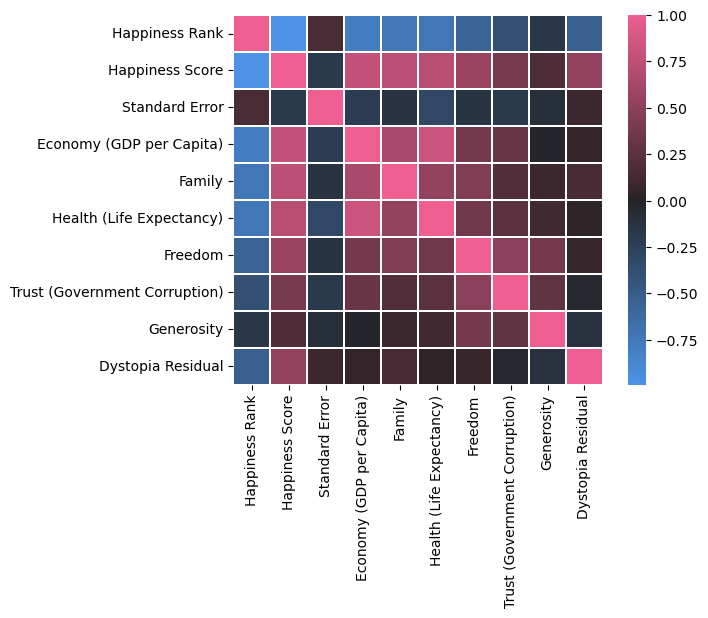

In [4]:
import seaborn as sns
corr = df.corr()
cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap = True)
sns.heatmap(corr, vmax = 1, cmap = cmap, square = True, linewidths = .2)

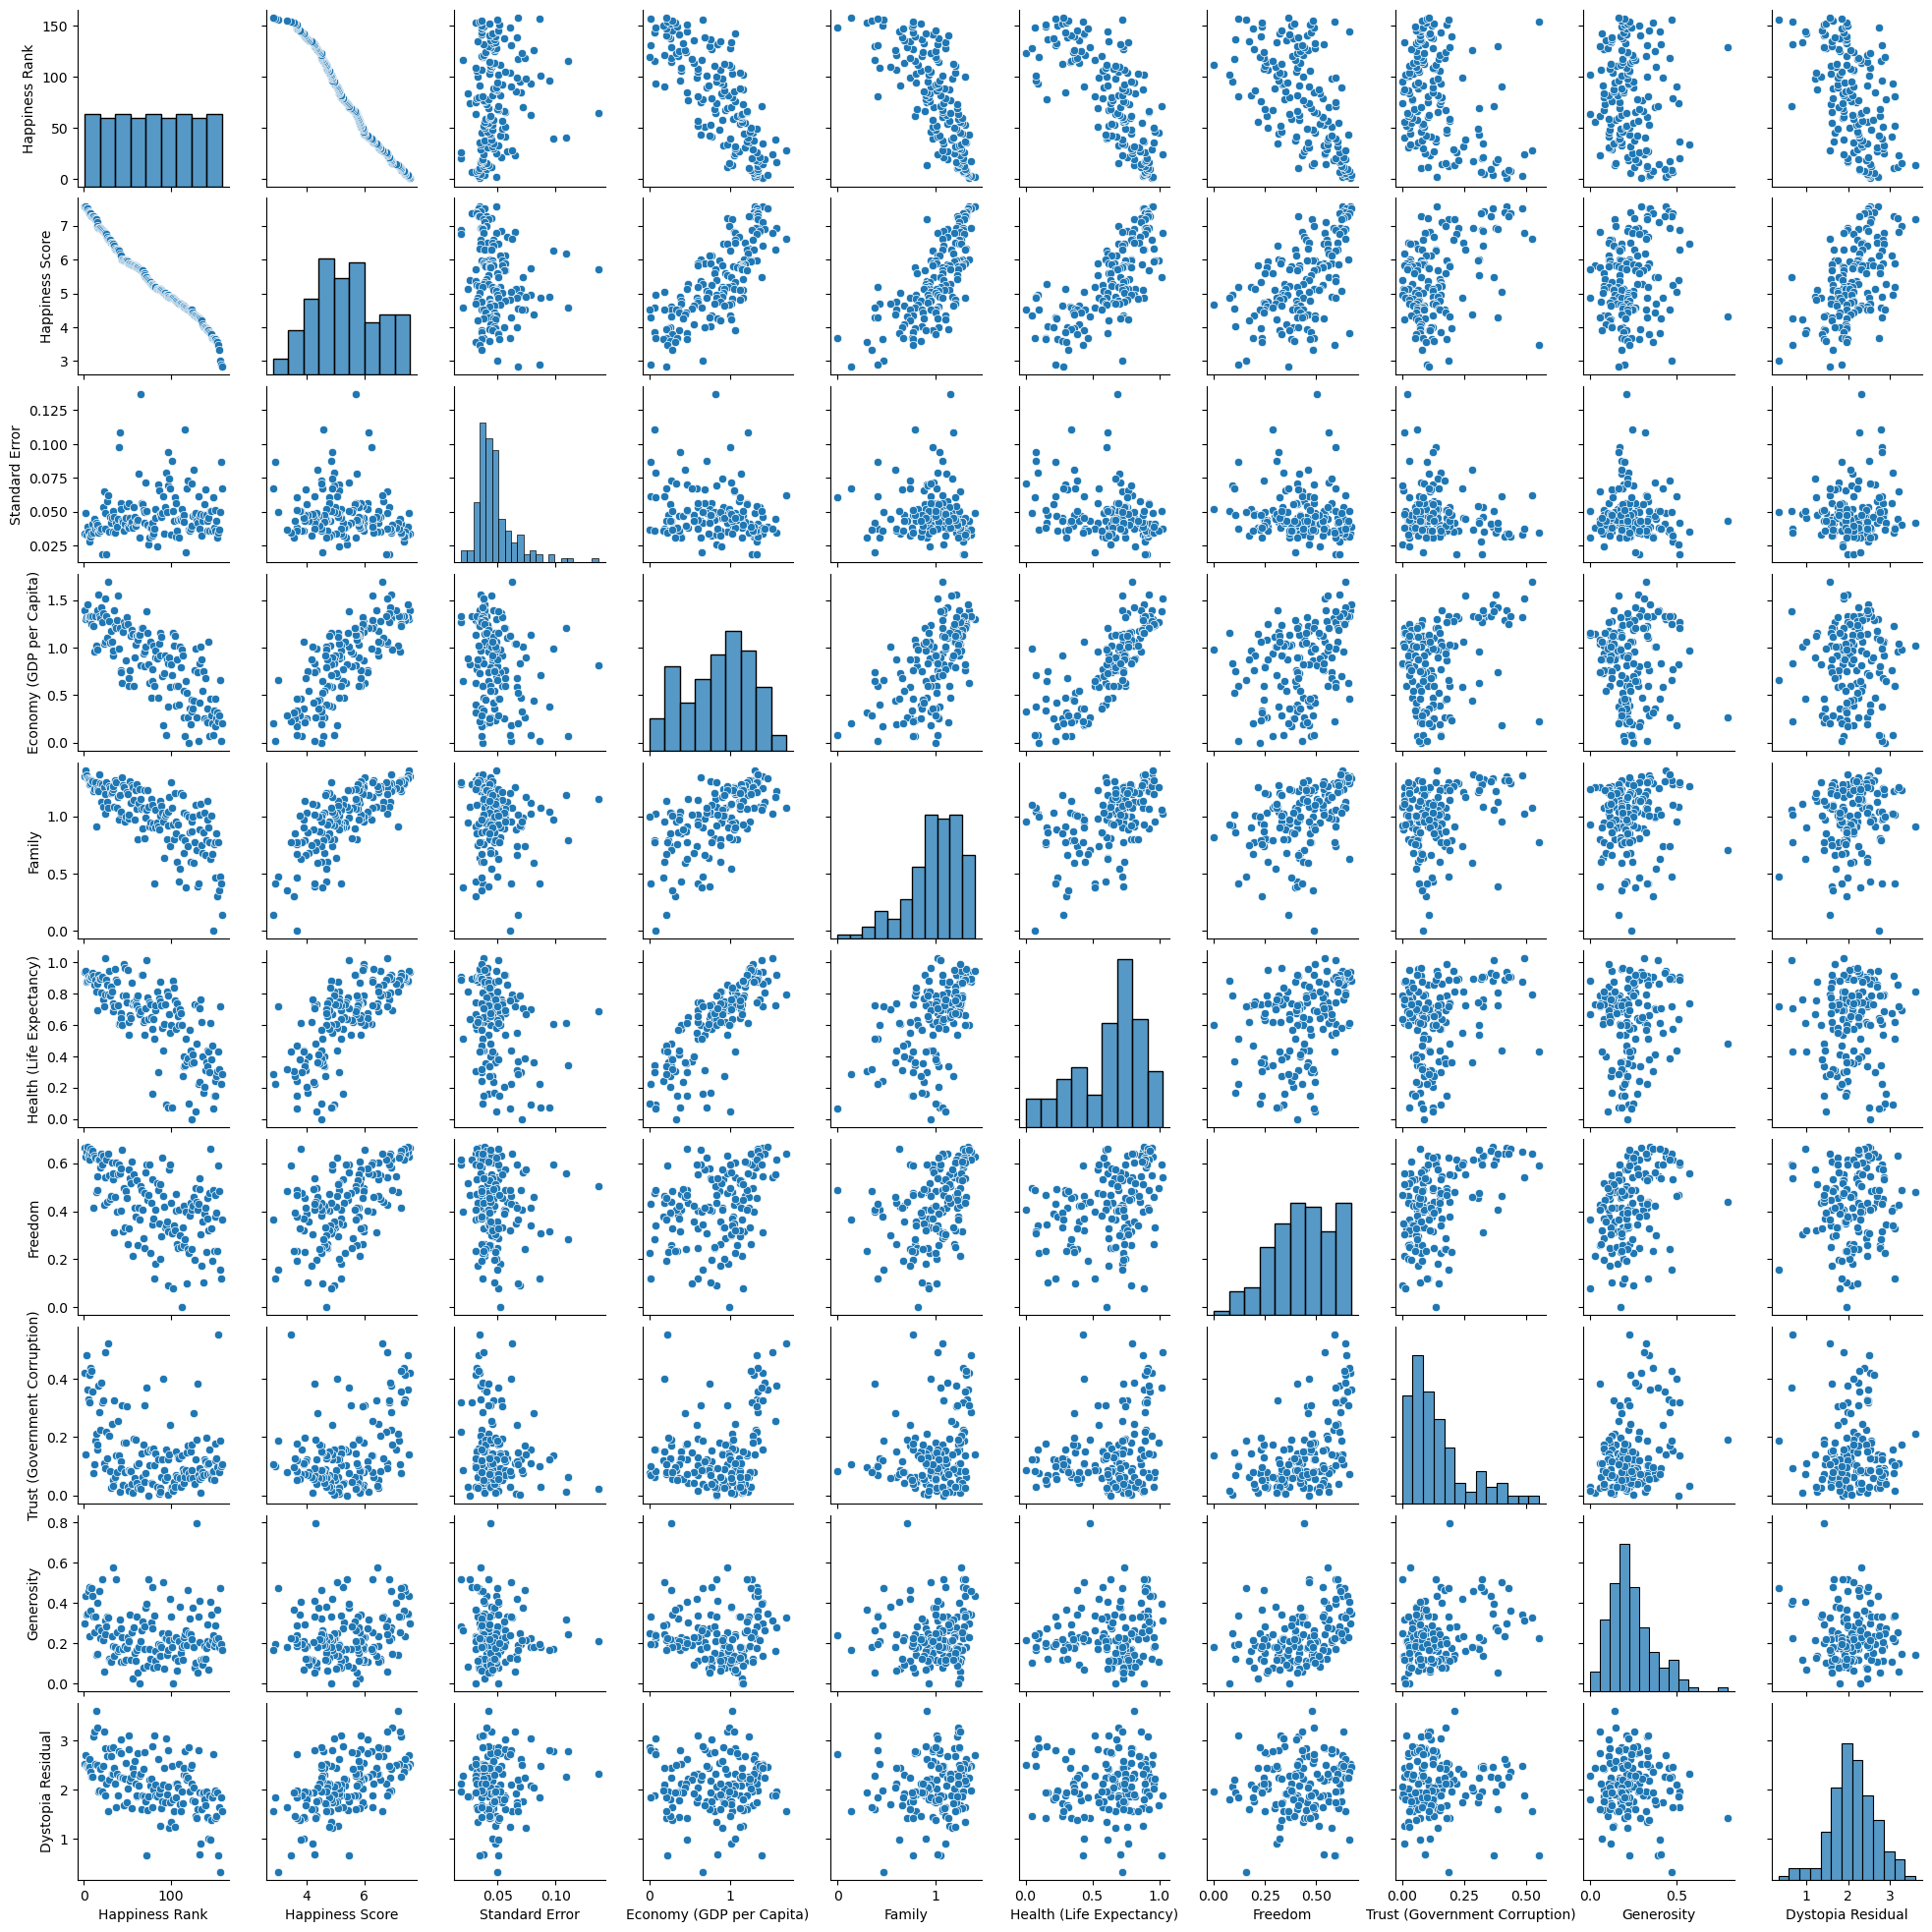

In [9]:
# Visualizing the relationships between features using pair plots  
sns.pairplot(data = df, height = 2)  

### Ici nous choisissons d'expliquer la variable "hapiness rank" par toutes les variables indépendantes que sont: Hapiness score, Economy, Family, Health, Freedom et Dystopia Residual. 
### Ces variables explicatives ont chacune une covariance supérieure en valeur absolue à 0.5.

# Estimation des paramètres de la regression linéaire multiple

In [5]:
y=df['Happiness Rank']
x=df[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Dystopia Residual']]
x=sm.add_constant(x)
# Create a fitted model
lm = sm.OLS(y,x).fit()

# Print model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Happiness Rank   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1715.
Date:                Sat, 01 Apr 2023   Prob (F-statistic):          3.63e-136
Time:                        10:37:52   Log-Likelihood:                -493.12
No. Observations:                 158   AIC:                             1000.
Df Residuals:                     151   BIC:                             1022.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Interprétation des données
### D'après les résultats du modèle, lorsque l'on considère un seuil de 5%, les variables Family et Freedom n,apportent pas une explication significative à la variabilité de la variable à expliquer Hapiness Rank. Car les proba P>|t| correspondantes sont inférieures à 0.05.

## Modèle approprié
### Le modèle approprié aura alors pour variables explicatives: Hapiness score, Economy, Health et Dystopia Residual.

In [6]:
y=df['Happiness Rank']
x=df[['Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)','Dystopia Residual']]
x=sm.add_constant(x)
# Create a fitted model
lm = sm.OLS(y,x).fit()

# Print model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Happiness Rank   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     2548.
Date:                Sat, 01 Apr 2023   Prob (F-statistic):          7.59e-139
Time:                        10:37:54   Log-Likelihood:                -494.87
No. Observations:                 158   AIC:                             999.7
Df Residuals:                     153   BIC:                             1015.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Dans ce deuxième modèle, la variable "Economy (GDP per Capita)" n'est pas significative.

In [7]:
y=df['Happiness Rank']
x=df[['Happiness Score','Health (Life Expectancy)','Dystopia Residual']]
x=sm.add_constant(x)
# Create a fitted model
lm = sm.OLS(y,x).fit()

# Print model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Happiness Rank   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     3387.
Date:                Sat, 01 Apr 2023   Prob (F-statistic):          2.50e-140
Time:                        10:37:55   Log-Likelihood:                -495.63
No. Observations:                 158   AIC:                             999.3
Df Residuals:                     154   BIC:                             1012.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Dans ce troisième dodèle, la variable "Dystopia Residual" n'est pas significative.

In [8]:
y=df['Happiness Rank']
x=df[['Happiness Score','Health (Life Expectancy)']]
x=sm.add_constant(x)
# Create a fitted model
lm = sm.OLS(y,x).fit()

# Print model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Happiness Rank   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     5052.
Date:                Sat, 01 Apr 2023   Prob (F-statistic):          7.81e-142
Time:                        10:37:56   Log-Likelihood:                -496.57
No. Observations:                 158   AIC:                             999.1
Df Residuals:                     155   BIC:                             1008.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Finalement, seules "Happiness Score" et "Health (Life Expectancy)" expliquent de manière significative la variabilité de "Happiness Rank".